### Pre-Launch Forecaster,NLP, Features Extraction and Sentinement Analysis

In [74]:
#importing needed libraries
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
import spacy
from sklearn import preprocessing
import plotly.graph_objects as go
import plotly.express as px
from tqdm import tqdm
from tabulate import tabulate
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import csv
import tweepy as tw
nlp = spacy.load('en_core_web_lg')

In [147]:
#reading the dataset into a DataFrame
df = pd.read_csv('C:/Users/abdul/Desktop/FYP/Datasets/Scrapped_Car_Reviews_Honda.csv',
                 lineterminator='\n',header=0)
#removing the Unammed coulumns and change the mistaken namings

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.rename(columns={'Rating\r': 'Ratings'})
#showing the head of the DataFrame
df.head()

,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Ratings
0,on 03/01/17 13:11 PM (PST),kris corah,2007 Honda Element SUV LX 4dr SUV AWD (2.4L 4c...,QUIRKY AND PRACTICAL,4 years with our element. Honestly there isn'...,4.0
1,on 09/02/16 18:22 PM (PDT),Carol Shafford,2007 Honda Element SUV EX 4dr SUV AWD (2.4L 4c...,Go Anywhere with your Element,I have owned my Element since 2007 when I pur...,5.0
2,on 11/12/15 08:04 AM (PST),Gale,2007 Honda Element SUV EX 4dr SUV AWD (2.4L 4c...,Such a cool car!,Lowest maintenance of any vehicle I've ever o...,1.0
3,on 08/13/15 15:40 PM (PDT),Judy Eastham,2007 Honda Element SUV LX 4dr SUV (2.4L 4cyl 5M),"From soup to nuts, it does it all.",The only thing I'd change is the drink holder...,5.0
4,on 03/14/13 10:38 AM (PDT),boeserkritiker,2007 Honda Element SUV LX 4dr SUV (2.4L 4cyl 5A),good value,I bought this vehicle new in 2007. got 97K mi...,4.0


In [148]:
#checking for missing data and output the number of records and their percentage
count = df.isnull().sum().sort_values(ascending = False)
percentage=((df.isnull().sum()/len(df)*100)).sort_values(ascending = False)
missing_data=pd.concat([count,percentage], axis=1 
,keys=["number of missing data","percentage of missing data"])
missing_data

,number of missing data,percentage of missing data
Review_Title,1,0.007884
Review_Date,0,0.000000
Author_Name,0,0.000000
Vehicle_Title,0,0.000000
Review,0,0.000000
Ratings,0,0.000000


In [149]:
#merge the review title and the reviews into one column
df['reviews']=df['Review_Title']+df['Review']
df.reviews=df.reviews.astype(str)

In [150]:
#cleaning the reviews texts by removing the unneeded charachters such as
# punctuation, uppercases, brackets, numbers and newLines
def text_cleaner(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    text = re.sub('\n','',text)
    text = re.sub('\r','',text)
 

    return text
cleaned = lambda x: text_cleaner(x)


In [151]:
df.head(1)

,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Ratings,reviews
0,on 03/01/17 13:11 PM (PST),kris corah,2007 Honda Element SUV LX 4dr SUV AWD (2.4L 4c...,QUIRKY AND PRACTICAL,4 years with our element. Honestly there isn'...,4.0,QUIRKY AND PRACTICAL 4 years with our element....


In [152]:
#applying the cleaning fuction to our reviews column and output the results into new column
df['Clean_rev'] = pd.DataFrame(df.reviews.apply(cleaned))
df.head()

,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Ratings,reviews,Clean_rev
0,on 03/01/17 13:11 PM (PST),kris corah,2007 Honda Element SUV LX 4dr SUV AWD (2.4L 4c...,QUIRKY AND PRACTICAL,4 years with our element. Honestly there isn'...,4.0,QUIRKY AND PRACTICAL 4 years with our element....,quirky and practical years with our element h...
1,on 09/02/16 18:22 PM (PDT),Carol Shafford,2007 Honda Element SUV EX 4dr SUV AWD (2.4L 4c...,Go Anywhere with your Element,I have owned my Element since 2007 when I pur...,5.0,Go Anywhere with your Element I have owned my ...,go anywhere with your element i have owned my ...
2,on 11/12/15 08:04 AM (PST),Gale,2007 Honda Element SUV EX 4dr SUV AWD (2.4L 4c...,Such a cool car!,Lowest maintenance of any vehicle I've ever o...,1.0,Such a cool car! Lowest maintenance of any veh...,such a cool car lowest maintenance of any vehi...
3,on 08/13/15 15:40 PM (PDT),Judy Eastham,2007 Honda Element SUV LX 4dr SUV (2.4L 4cyl 5M),"From soup to nuts, it does it all.",The only thing I'd change is the drink holder...,5.0,"From soup to nuts, it does it all. The only th...",from soup to nuts it does it all the only thin...
4,on 03/14/13 10:38 AM (PDT),boeserkritiker,2007 Honda Element SUV LX 4dr SUV (2.4L 4cyl 5A),good value,I bought this vehicle new in 2007. got 97K mi...,4.0,good value I bought this vehicle new in 2007. ...,good value i bought this vehicle new in got ...


In [153]:
#now we drop the unnecessary columns to keep our dataframe clean
df=df.drop(['reviews','Review','Review_Title'], axis = 1) 
df.head()

,Review_Date,Author_Name,Vehicle_Title,Ratings,Clean_rev
0,on 03/01/17 13:11 PM (PST),kris corah,2007 Honda Element SUV LX 4dr SUV AWD (2.4L 4c...,4.0,quirky and practical years with our element h...
1,on 09/02/16 18:22 PM (PDT),Carol Shafford,2007 Honda Element SUV EX 4dr SUV AWD (2.4L 4c...,5.0,go anywhere with your element i have owned my ...
2,on 11/12/15 08:04 AM (PST),Gale,2007 Honda Element SUV EX 4dr SUV AWD (2.4L 4c...,1.0,such a cool car lowest maintenance of any vehi...
3,on 08/13/15 15:40 PM (PDT),Judy Eastham,2007 Honda Element SUV LX 4dr SUV (2.4L 4cyl 5M),5.0,from soup to nuts it does it all the only thin...
4,on 03/14/13 10:38 AM (PDT),boeserkritiker,2007 Honda Element SUV LX 4dr SUV (2.4L 4cyl 5A),4.0,good value i bought this vehicle new in got ...


In [154]:
txt = 'SpaCy is a great library'
doc = nlp(txt)
spacy.displacy.render(doc,style='dep')

In [155]:
#now we do feature extraction through NLP techniques using SpaCy library
features = []
for x in tqdm(range(len(df['Clean_rev']))):
#initialize set of lists
    Adjectival_pairs = []
    Adverbial_pairs = []
    compound_pairs = []
    xcomp_pairs = []
    Negation_pairs = []
    if len(str(df['Clean_rev'][x])) != 0:
        lines=str(df['Clean_rev'][x])
        doc = nlp(lines)
        str1=''
        str2=''
#tokenization/parsing
        for token in doc:
            if token.pos_ is 'NOUN':
                for j in token.lefts:
                    if j.dep_ =='compound':
                        compound_pairs.append((j.text+' '+token.text))
                    if j.dep_ is 'amod' and j.pos_ is 'ADJ':
                        str1 = j.text+' '+token.text
                        for k in j.lefts:
                            if k.dep_ is 'advmod':
                                str2 = k.text+' '+j.text+' '+token.text
                                Adjectival_pairs.append(k.text+' '+j.text+' '+token.text)
                                mtch = re.search(re.escape(str1),re.escape(str2))
                                if mtch is not None:
                                    Adjectival_pairs.remove(str1)
            if token.pos_ is 'VERB':
                        for j in token.lefts:
                            if j.dep_ is 'advmod' and j.pos_ is 'ADV':
                                Adverbial_pairs.append(j.text+' '+token.text)
                            if j.dep_ is 'neg' and j.pos_ is 'ADV':
                                Negation_pairs.append(j.text+' '+token.text)
                        for j in token.rights:
                            if j.dep_ is 'advmod'and j.pos_ is 'ADV':
                                Adverbial_pairs.append(token.text+' '+j.text)
                            if j.dep_ is 'neg' and j.pos_ is 'ADV':
                                Negation_pairs.append(j.text+' '+token.text)
            if token.pos_ is 'ADJ':
                for j,h in zip(token.rights,token.lefts):
                    if j.dep_ is 'xcomp' and h.dep_ is not 'neg':
                        for k in j.lefts:
                            if k.dep_ is 'aux':
                                xcomp_pairs.append(token.text+' '+k.text+' '+j.text)
                    elif j.dep_ is 'xcomp' and h.dep_ is 'neg':
                        if k.dep_ is 'aux':
                                Negation_pairs.append(h.text +' '+token.text+' '+k.text+' '+j.text)
        pairs = list(set(Adjectival_pairs+Adverbial_pairs+Negation_pairs+xcomp_pairs))
        for i in range(len(pairs)):
            if len(compound_pairs)!=0:
                for comp in compound_pairs:
                    mtch = re.search(re.escape(comp[1]),re.escape(pairs[i]))
                    if mtch is not None:
                        pairs[i] = pairs[i].replace(mtch.group(),comp[0])
        
            
    features.append(compound_pairs)
df['FeaturesDiscussed'] = features
                            
df.head()

100%|████████████████████████████████████████████████████████████████████████████| 12684/12684 [04:49<00:00, 43.77it/s]


,Review_Date,Author_Name,Vehicle_Title,Ratings,Clean_rev,FeaturesDiscussed
0,on 03/01/17 13:11 PM (PST),kris corah,2007 Honda Element SUV LX 4dr SUV AWD (2.4L 4c...,4.0,quirky and practical years with our element h...,"[engine cycle, transmission road, road noise, ..."
1,on 09/02/16 18:22 PM (PDT),Carol Shafford,2007 Honda Element SUV EX 4dr SUV AWD (2.4L 4c...,5.0,go anywhere with your element i have owned my ...,"[wheel drive, drive version, safety features, ..."
2,on 11/12/15 08:04 AM (PST),Gale,2007 Honda Element SUV EX 4dr SUV AWD (2.4L 4c...,1.0,such a cool car lowest maintenance of any vehi...,[cargo space]
3,on 08/13/15 15:40 PM (PDT),Judy Eastham,2007 Honda Element SUV LX 4dr SUV (2.4L 4cyl 5M),5.0,from soup to nuts it does it all the only thin...,"[d change, drink holders, cargo room, water he..."
4,on 03/14/13 10:38 AM (PDT),boeserkritiker,2007 Honda Element SUV LX 4dr SUV (2.4L 4cyl 5A),4.0,good value i bought this vehicle new in got ...,"[ exceptions, door design, parking spots, chi..."


In [159]:
#Performing a Sentiment Analysis using Vader Library
analyzer = SentimentIntensityAnalyzer()
negative = []
positive = []
neutral = []
sentiment = []
comp = []
for i in range(len(df)):
    sent = analyzer.polarity_scores(df['Clean_rev'][i])
    if sent['compound'] >= 0.2:
        sentiment.append("Positive")
        positive.append(sent['pos'])
        comp.append(sent['compound'])
    if sent['compound'] > -0.2 and sent['compound'] <0.2:
        sentiment.append("Neutral")
        neutral.append(sent['neu'])
        comp.append(sent['compound'])
    elif sent['compound'] <= 0.2:
        sentiment.append("Negative")
        negative.append(sent['neg'])
        comp.append(sent['compound'])
df['Sentiment']=sentiment
df['Compound_Score']=comp
df.head(20)

,Review_Date,Author_Name,Vehicle_Title,Ratings,Clean_rev,FeaturesDiscussed,Sentiment,Compound_Score
0,on 03/01/17 13:11 PM (PST),kris corah,2007 Honda Element SUV LX 4dr SUV AWD (2.4L 4c...,4.000,quirky and practical years with our element h...,"[engine cycle, transmission road, road noise, ...",Positive,0.9928
1,on 09/02/16 18:22 PM (PDT),Carol Shafford,2007 Honda Element SUV EX 4dr SUV AWD (2.4L 4c...,5.000,go anywhere with your element i have owned my ...,"[wheel drive, drive version, safety features, ...",Positive,0.9764
2,on 11/12/15 08:04 AM (PST),Gale,2007 Honda Element SUV EX 4dr SUV AWD (2.4L 4c...,1.000,such a cool car lowest maintenance of any vehi...,[cargo space],Positive,0.9650
3,on 08/13/15 15:40 PM (PDT),Judy Eastham,2007 Honda Element SUV LX 4dr SUV (2.4L 4cyl 5M),5.000,from soup to nuts it does it all the only thin...,"[d change, drink holders, cargo room, water he...",Positive,0.7307
4,on 03/14/13 10:38 AM (PDT),boeserkritiker,2007 Honda Element SUV LX 4dr SUV (2.4L 4cyl 5A),4.000,good value i bought this vehicle new in got ...,"[ exceptions, door design, parking spots, chi...",Neutral,0.1779
5,on 10/21/12 20:54 PM (PDT),sarasmydog,2007 Honda Element SUV EX 4dr SUV AWD (2.4L 4c...,4.750,ex awd atomic blue element automatic although...,[gas mileage],Positive,0.9260
6,on 01/15/11 14:14 PM (PST),miamioolite,2007 Honda Element SUV EX 4dr SUV AWD (2.4L 4c...,3.875,good car not quite as advertised i had this ca...,"[build quality, wheel drive, cargo capacity, a...",Positive,0.7762
7,on 09/12/10 00:00 AM (PDT),"""D""",2007 Honda Element SUV SC 4dr SUV (2.4L 4cyl 5A),4.625,a great used car to buy i bought my honda ele...,"[ element, honda element, cadillac ride, prop...",Positive,0.9905
8,on 07/23/10 12:05 PM (PDT),jharris09,2007 Honda Element SUV SC 4dr SUV (2.4L 4cyl 5A),4.500,one of my favorites the element lacks in featu...,"[auto headlights, power seats, gas mileage, ma...",Positive,0.9617
9,on 04/26/10 23:32 PM (PDT),James,2007 Honda Element SUV EX 4dr SUV (2.4L 4cyl 5A),3.875,element fell in love with this vehicle at the...,[],Positive,0.6310


In [160]:
neg_avg= sum(negative)/len(negative)
pos_avg= sum(positive)/len(positive)
neu_avg= sum(neutral)/len(neutral)

In [161]:
#Using PlotLy Library for a Pie Char Visualization
labels = ['Negative','Positive','Neutral/Satisfied']
values = [neg_avg,pos_avg,neu_avg]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0.2, 0])])
fig.show()

In [162]:
# We Pass a key feature to look for it in our features
key='speed'
data = pd.DataFrame([])
# search for the key and fetch the data into the Data df
for i in range(len(df)):
    if key in str(features[i]):
         data = data.append(pd.DataFrame({'Rating': df['Ratings'][i], 
                                          'Score': df['Compound_Score'][i],
                                          'FeaturesDiscussed': str(df['FeaturesDiscussed'][i]),
                                          'Sentiment': df['Sentiment'][i]},
                                         index=[0]), ignore_index=True)

In [163]:
data

,Rating,Score,FeaturesDiscussed,Sentiment
0,3.375,-0.7288,"['components tires', ' pads', ' speedometer...",Negative
1,4.875,0.9831,[' speed'],Positive
2,3.875,0.9617,"['utility body', 'time wagon', 'honda reliabil...",Positive
3,4.875,0.9086,"['element awd', 'fuel mileage', 'highwayinters...",Positive
4,4.750,0.9595,['speed miles'],Positive
...,...,...,...,...
437,3.000,0.9049,"[' speed', ' van', 'car research', ' star',...",Positive
438,5.000,0.9628,"['road trip', 'yard waste', 'dump finding', 'h...",Positive
439,5.000,0.9990,"['wrx sti', 'gas mileage', 'train station', 't...",Positive
440,5.000,0.9643,"[' fit', 'honda fit', 'steering wheel', 'whee...",Positive


In [164]:
#Statistics about the results
#first we check if the df is empty
if len(data) > 0 :
    print(tabulate([[data['Rating'].mean(),data['Rating'].count(), data['Sentiment'].value_counts(),
                     data['Score'].mean()
                     ]],
                   headers=['Average of ratings', 'Number of records','Sentiment','SentimentScoreMean']))
#if the dataframe is empty
else:
    print('There are no records or the feature doesnt exist in this model')

  Average of ratings    Number of records  Sentiment                        SentimentScoreMean
--------------------  -------------------  -----------------------------  --------------------
             4.25933                  442  Positive    353                             0.57928
                                           Negative     74
                                           Neutral      15
                                           Name: Sentiment, dtype: int64


In [165]:
#using plotly to visualize a histogram
#checking if the dataframe is empty
if len(data) > 0 :
    Fac=['Positive Sentiments', 'Negative Sentiments', 'Neutral Sentiments'] # we declare the titles
# providing the data
    fig = go.Figure([go.Bar(x=Fac, y=[data.Sentiment.str.count("Positive").sum(),
                                         data.Sentiment.str.count("Negative").sum(),
                                         data.Sentiment.str.count("Neutral").sum()])])
    fig.show()


In [166]:
#creating a table from tabulate library to show the data
#check the dataframe
if len(data) > 0 :

    print(tabulate([[data['Rating'],data['FeaturesDiscussed'],data['Sentiment']]],
                  headers=['avg rate','keyFeaturesDiscussed','Sentiment'],showindex="never"))


avg rate                                   keyFeaturesDiscussed                                      Sentiment
-----------------------------------------  --------------------------------------------------------  -------------------------------------------
0      3.375                               0      ['components tires', '   pads', '  speedometer...  0      Negative
1      4.875                               1                                            ['  speed']  1      Positive
2      3.875                               2      ['utility body', 'time wagon', 'honda reliabil...  2      Positive
3      4.875                               3      ['element awd', 'fuel mileage', 'highwayinters...  3      Positive
4      4.750                               4                                        ['speed miles']  4      Positive
       ...                                                              ...                                   ...
437    3.000                               43

In [167]:
#Tweepy
#we declare our credintials
consumer_key="DSBPI5oyPQEiY3qgg2fecQuLR"
consumer_secret="cqKaon6dQdl66WW55HbuQal89A1cRuFuMY3EwhxgUJVu44Vpnu"
access_token="353386879-jA0Td42vAAz8tSRWZb8MozhAppx8KNEypHQEHp9G"
access_token_secret="LhFN9joYIFndaBmXKU7Ws3M1YkpwfeWPkuKEYqNtW97Qf"
#initialize the api
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [168]:
#a function to remove emojis
def remove_emoji(string):
    emoji_pattern = re.compile("["
                       "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emotions
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "\U000024C2-\U0001F251" 
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [169]:
#tweepy api usage
#we define the sets for stats
ids = set()
usrs = []
tweets = []
dates = []
#we loop into tweets with our keyword
for tweet in tw.Cursor(api.search, 
                    q="#civic", #keyword
                    lang="en").items(50000): #language and maximum number of items
    if (not tweet.retweeted) and ('@' not in tweet.text): # we exclude the retweets and mentions
        ids.add(tweet.id) # add new id
        usrs.append(tweet.user.screen_name)
        tweets.append(tweet.text)
        dates.append(tweet.created_at)
print ("number of unique ids: ",format(len(ids))) #print the number of records


number of unique ids:  175


In [170]:
#intialize the dataframe
df_twt=pd.DataFrame(columns=['user','tweet','date'])
df_twt['user']=usrs #adding the users from user list
df_twt['tweet']=tweets # adding tweets
df_twt['date']=dates # dates of the tweets
df_twt

,user,tweet,date
0,mnss2903,the black one though🥺🥺🥺🤤\n#Civic\n#Honda\n\nso...,2021-04-25 13:19:50
1,Vii_oz,The power of dreams.\n#honda #TypeR #Civic #fk...,2021-04-25 13:14:19
2,DuffMan_D,Winter J's Racing colours for the FK2 Civic Ty...,2021-04-25 12:15:50
3,abomagdi,TOMS ELECTRONIC THROTTLE CONTROLLER LTSIII FOR...,2021-04-25 12:08:04
4,FbrOutlaw,The car + the details that make me love it. Wi...,2021-04-25 11:54:36
...,...,...,...
170,TheImportGeek,Trying to get rid of my #ej2 #civic motor and ...,2021-04-17 15:48:05
171,ENEOSUSA,The FK8 CTR is prone to generate heat; maintai...,2021-04-17 15:30:02
172,LkldAutomall,"At #LakelandAutomall, we have all kinds of #Gr...",2021-04-17 15:10:04
173,topgovtgrant,ICYMI Positive Tracks Taps into Youth Skills t...,2021-04-17 14:19:03


In [171]:
#cleaning the text of the tweets
df_twt['Clean_tweet'] = pd.DataFrame(df_twt.tweet.apply(cleaned))


In [172]:
#remove the popular emojis
df_twt['Clean_tweet'] = pd.DataFrame(df_twt.tweet.apply(remove_emoji))
df_twt.tail(-1)

,user,tweet,date,Clean_tweet
1,Vii_oz,The power of dreams.\n#honda #TypeR #Civic #fk...,2021-04-25 13:14:19,The power of dreams.\n#honda #TypeR #Civic #fk...
2,DuffMan_D,Winter J's Racing colours for the FK2 Civic Ty...,2021-04-25 12:15:50,Winter J's Racing colours for the FK2 Civic Ty...
3,abomagdi,TOMS ELECTRONIC THROTTLE CONTROLLER LTSIII FOR...,2021-04-25 12:08:04,TOMS ELECTRONIC THROTTLE CONTROLLER LTSIII FOR...
4,FbrOutlaw,The car + the details that make me love it. Wi...,2021-04-25 11:54:36,The car + the details that make me love it. Wi...
5,Iam2old4this2,"It seems, it's the highest uneducated communit...",2021-04-25 11:43:11,"It seems, it's the highest uneducated communit..."
...,...,...,...,...
170,TheImportGeek,Trying to get rid of my #ej2 #civic motor and ...,2021-04-17 15:48:05,Trying to get rid of my #ej2 #civic motor and ...
171,ENEOSUSA,The FK8 CTR is prone to generate heat; maintai...,2021-04-17 15:30:02,The FK8 CTR is prone to generate heat; maintai...
172,LkldAutomall,"At #LakelandAutomall, we have all kinds of #Gr...",2021-04-17 15:10:04,"At #LakelandAutomall, we have all kinds of #Gr..."
173,topgovtgrant,ICYMI Positive Tracks Taps into Youth Skills t...,2021-04-17 14:19:03,ICYMI Positive Tracks Taps into Youth Skills t...


In [173]:
#VADER sentiment analysis
#initialize the analyzer and sets of stats
analyzer = SentimentIntensityAnalyzer()
negative = []
positive = []
neutral = []
sentiment = []
comp = []
#loop in the cleaned tweets
for i in range(len(df_twt)):
    sent = analyzer.polarity_scores(df_twt['Clean_tweet'][i])
    #initialize our condition for positive sentiment
    if sent['compound'] >= 0.05:
        sentiment.append("Positive") # add positive for the sentiment column
        positive.append(sent['pos']) # we add the positive score to positive list
        comp.append(sent['compound']) # add the compound score for this column
        #initialize neutral sentiment condition
    if sent['compound'] > -0.05 and sent['compound'] <0.05:
        sentiment.append("Neutral") # add meutral for the sentiment column
        neutral.append(sent['neu']) # add the neutral score to neutral list
        comp.append(sent['compound'])# add the compound score for this column
    elif sent['compound'] <= 0.05:
        sentiment.append("Negative")
        negative.append(sent['neg'])
        comp.append(sent['compound'])
df_twt['Sentiment']=sentiment # add the scores of sentiment to the dataframe
df_twt['Compound_Score']=comp # adding the compound scores to the dataframe
df_twt.head()

,user,tweet,date,Clean_tweet,Sentiment,Compound_Score
0,mnss2903,the black one though🥺🥺🥺🤤\n#Civic\n#Honda\n\nso...,2021-04-25 13:19:50,the black one though\n#Civic\n#Honda\n\nsource...,Neutral,0.0000
1,Vii_oz,The power of dreams.\n#honda #TypeR #Civic #fk...,2021-04-25 13:14:19,The power of dreams.\n#honda #TypeR #Civic #fk...,Positive,0.4019
2,DuffMan_D,Winter J's Racing colours for the FK2 Civic Ty...,2021-04-25 12:15:50,Winter J's Racing colours for the FK2 Civic Ty...,Positive,0.3400
3,abomagdi,TOMS ELECTRONIC THROTTLE CONTROLLER LTSIII FOR...,2021-04-25 12:08:04,TOMS ELECTRONIC THROTTLE CONTROLLER LTSIII FOR...,Neutral,0.0000
4,FbrOutlaw,The car + the details that make me love it. Wi...,2021-04-25 11:54:36,The car + the details that make me love it. Wi...,Positive,0.4767


In [174]:
#we compute the average score for each sentiment
neg_avg= sum(negative)/len(negative)
pos_avg= sum(positive)/len(positive)
neu_avg= sum(neutral)/len(neutral)

In [175]:
#Using PlotLy Library for a Pie Char Visualization
labels = ['Negative','Positive','Neutral/Satisfied']
values = [neg_avg,pos_avg,neu_avg]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0.2, 0])])
fig.show()

In [176]:
if len(df_twt) > 0 :
    print(tabulate([[df_twt['tweet'].count(), df_twt['Sentiment'].value_counts(),
                     df_twt['Compound_Score'].mean()
                     ]],
                   headers=[ 'Number of records','Sentiment','SentimentScoreMean']))
else:
    print('There are no records or the feature doesnt exist in this model')

  Number of records  Sentiment                        SentimentScoreMean
-------------------  -----------------------------  --------------------
                175  Positive    90                             0.247041
                     Neutral     68
                     Negative    17
                     Name: Sentiment, dtype: int64


In [177]:
df_civic = df[df["Vehicle_Title"].str.contains("Honda Civic")]

df_civic.reset_index(drop=True, inplace=True)

df_civic

,Review_Date,Author_Name,Vehicle_Title,Ratings,Clean_rev,FeaturesDiscussed,Sentiment,Compound_Score
0,on 02/14/18 12:38 PM (PST),Kenneth Hausmann,1997 Honda Civic del Sol VTEC VTEC 2dr Coupe,5.000,best car i have owned and i have had cars the...,"[corvettes mustangs, gas mileage, texas heat, ...",Positive,0.9852
1,on 10/19/17 10:19 AM (PDT),stevie bleu,1997 Honda Civic del Sol VTEC VTEC 2dr Coupe,5.000,my prize possession of years vtec dels i bo...,"[prize possession, vtec dels, water pump, body...",Positive,0.6808
2,on 07/26/17 08:34 AM (PDT),G Cl3aN,1997 Honda Civic del Sol VTEC VTEC 2dr Coupe,5.000,awesome investment this is a person ride only...,"[person ride, family car, engine leaks, leathe...",Positive,0.9091
3,on 03/28/15 09:27 AM (PDT),Paulo Nicolau,1997 Honda Civic del Sol VTEC VTEC 2dr Coupe,4.875,impossible find honda del sol vtec i am ext...,"[sol vtec, honda sol, del sol, gas saver]",Positive,0.9592
4,on 10/22/04 00:00 AM (PDT),Danielle151,1997 Honda Civic del Sol VTEC VTEC 2dr Coupe,4.750,will now be a honda owner for life i love my l...,"[honda owner, sports car]",Positive,0.9624
...,...,...,...,...,...,...,...,...
3633,on 05/18/02 00:00 AM (PDT),gingerg1218,1999 Honda Civic Coupe EX 2dr Coupe,5.000,a perfect my first new honda civic was in wi...,"[honda civic, body style]",Positive,0.8917
3634,on 05/07/02 00:00 AM (PDT),mandee,1999 Honda Civic Coupe EX 2dr Coupe,4.875,great car i love everthing about this car the...,[],Positive,0.9686
3635,on 04/11/02 00:00 AM (PDT),stacy,1999 Honda Civic Coupe HX 2dr Coupe,3.250,transmission problems on civic hx model i boug...,"[transmission problems, hx model, transmission...",Negative,-0.9274
3636,on 03/11/02 16:47 PM (PST),Tara Healy,1999 Honda Civic Coupe EX 2dr Coupe,4.500,review of civic ex vehicle is fun to driverel...,[ex vehicle],Positive,0.8807


In [178]:
keys='engine'
data_c = pd.DataFrame([])
# search for the key and fetch the data into the Data df

for i in range(len(df_civic)):
    if keys in str(features[i]):
         data_c = data_c.append(pd.DataFrame({'Rating': df_civic['Ratings'][i], 
                                          'Score': df_civic['Compound_Score'][i],
                                          'FeaturesDiscussed': str(df_civic['FeaturesDiscussed'][i]),
                                          'Sentiment': df_civic['Sentiment'][i]},
                                         index=[0]), ignore_index=True)


In [179]:
data_c

,Rating,Score,FeaturesDiscussed,Sentiment
0,5.000,0.9852,"['corvettes mustangs', 'gas mileage', 'texas h...",Positive
1,4.375,0.2230,"['honda sol', 'del sol', ' sol', 'del sol', '...",Positive
2,4.625,0.9423,"['del sol', ' sol', 'del sol', 'sol sol', 'de...",Positive
3,4.500,0.9647,"['si sedan', 'sedan brand', 'belowboth issues'...",Positive
4,4.875,0.9227,['gear sticks'],Positive
...,...,...,...,...
271,4.500,0.3400,"['honda dealers', 'carpet level', 'car park', ...",Positive
272,4.750,0.8771,[],Positive
273,4.500,0.5467,"['moms car', 'wind noise', 'audio systemit', '...",Positive
274,4.625,0.7024,"['ex coupe', 'power window', 'window regulator...",Positive


In [180]:
import random
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn import preprocessing

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [192]:
le = preprocessing.LabelEncoder()
df1=df
df1['Sentiment'] = le.fit_transform(df1['Sentiment'])
df1['Clean_rev'] = le.fit_transform(df1['Clean_rev'])
df1['Vehicle_Title'] = le.fit_transform(df1['Vehicle_Title'])


In [193]:
df1

,Vehicle_Title,Ratings,Clean_rev,Sentiment,Compound_Score
0,657,4.0,10063,2,0.9928
1,654,5.0,4326,2,0.9764
2,653,1.0,10993,2,0.9650
3,656,5.0,4101,2,0.7307
4,655,4.0,4636,1,0.1779
...,...,...,...,...,...
12679,1478,5.0,529,2,0.8932
12680,1478,5.0,7716,2,0.9839
12681,1478,5.0,1166,2,0.6908
12682,1478,5.0,532,2,0.9990


<AxesSubplot:>

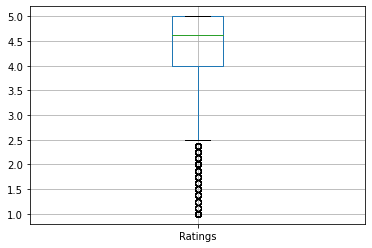

In [194]:
df1.boxplot(['Ratings'])

In [114]:
df2 = df2[df2.Ratings >2]
df2

,Ratings,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Compound_Score
0,5.000,2015.0,240.0,4.0,4.0,34.0,23.0,3916.0,0.9231
1,3.000,2015.0,240.0,4.0,4.0,34.0,23.0,3916.0,0.7562
2,5.000,2015.0,240.0,4.0,4.0,34.0,23.0,3916.0,0.7717
4,5.000,2015.0,240.0,4.0,4.0,34.0,23.0,3916.0,0.0000
5,5.000,2015.0,240.0,4.0,4.0,34.0,23.0,3916.0,0.9300
...,...,...,...,...,...,...,...,...,...
8055,4.875,2014.0,552.0,8.0,4.0,20.0,14.0,3916.0,0.8510
8056,4.125,2014.0,552.0,8.0,4.0,20.0,14.0,3916.0,-0.1685
8057,5.000,2014.0,552.0,8.0,4.0,20.0,14.0,3916.0,0.9755
8058,5.000,2014.0,552.0,8.0,4.0,20.0,14.0,3916.0,0.0000


In [195]:
np.random.seed(0)
df_train, df_test = train_test_split(df1,
                    train_size = 0.7, test_size = 0.3, random_state = 0)

In [196]:
y_train = df_train.pop('Compound_Score')
X_train = df_train

In [197]:
# Running RFE Algorithm to build the multiple regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)


In [198]:
col_sup = X_train.columns[rfe.support_]
col_sup

Index(['Vehicle_Title', 'Ratings', 'Clean_rev', 'Sentiment'], dtype='object')

In [199]:
X_train_rfe = X_train[col_sup]

In [200]:
import statsmodels.api as sm  
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Summary of the model performance
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:         Compound_Score   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 2.280e+04
Date:                Sun, 25 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:03:38   Log-Likelihood:                 2613.5
No. Observations:                8878   AIC:                            -5217.
Df Residuals:                    8873   BIC:                            -5182.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.9107      0.011    -85.573

In [201]:
X_train_rfe1 = X_train_rfe.drop('Clean_rev', 1,)

# Adding a constant variable and Build a second fitted model
X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of lregression model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:         Compound_Score   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 3.041e+04
Date:                Sun, 25 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:03:42   Log-Likelihood:                 2613.4
No. Observations:                8878   AIC:                            -5219.
Df Residuals:                    8874   BIC:                            -5190.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.9126      0.010    -91.405

In [ ]:
# Dropping highly correlated variables cylindernumber_six
X_train_rfe2 = X_train_rfe1.drop('reviews', 1,)

# Adding a constant variable and Build a third fitted model
X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

#Summary of regression model
print(lm_rfe2.summary())

In [202]:
y_train_price = lm_rfe1.predict(X_train_rfe1c)

In [203]:
import warnings
scaler = preprocessing.StandardScaler()

warnings.filterwarnings("ignore")
df_train = scaler.fit_transform(df_train)
df_train

array([[ 2.04952496,  0.76288175,  1.09797733,  0.50958379],
       [ 0.20099807, -1.71263057, -1.46577106, -2.14773477],
       [ 1.73941025, -0.33734595,  0.80766932,  0.50958379],
       ...,
       [-1.22188118,  0.35029636, -1.17847568,  0.50958379],
       [ 2.04141738,  0.76288175,  0.45519157,  0.50958379],
       [ 1.35835427, -0.33734595,  0.29826092,  0.50958379]])

In [204]:
y_test = df_test.pop('Compound_Score')
X_test = df_test

In [236]:
# Adding constant
X_test_1 = sm.add_constant(X_test)

#Taking only the columns of the model
X_test_new = X_test_1[X_train_rfe1c.columns]

# The final predictions should be made by the testing data, all previous predictions were made by training data
y_pred = lm_rfe1.predict(X_test_new)

In [235]:
X_test_1

,const,Vehicle_Title,Ratings,Sentiment
96,1.0,57,9,0
202,1.0,10,17,0
169,1.0,59,3,0
136,1.0,29,13,2
182,1.0,99,1,0
...,...,...,...,...
83,1.0,86,7,0
186,1.0,96,14,0
61,1.0,32,23,2
52,1.0,37,22,2


In [206]:
 print(len(y_pred))

3806


In [207]:
print(r2_score(y_test, y_pred)*100)

91.51183408263843


In [208]:
predt = pd.DataFrame({'Real data': y_test.tolist(), 'Predicted data': y_pred.tolist()})
predt.head(10)

,Real data,Predicted data
0,0.8743,0.849083
1,0.9674,0.871883
2,-0.2732,-0.634683
3,0.8890,0.863466
4,0.9695,0.846056
5,-0.5279,-0.640582
6,-0.9585,-0.694901
7,0.8366,0.851552
8,0.2440,0.680341
9,0.9716,0.858461


In [214]:
df_civic=df_civic.drop('Review_Date', axis=1)
df_civic=df_civic.drop('Author_Name', axis=1)

df_civic

,Vehicle_Title,Ratings,Clean_rev,Sentiment,Compound_Score
0,1997 Honda Civic del Sol VTEC VTEC 2dr Coupe,5.000,best car i have owned and i have had cars the...,Positive,0.9852
1,1997 Honda Civic del Sol VTEC VTEC 2dr Coupe,5.000,my prize possession of years vtec dels i bo...,Positive,0.6808
2,1997 Honda Civic del Sol VTEC VTEC 2dr Coupe,5.000,awesome investment this is a person ride only...,Positive,0.9091
3,1997 Honda Civic del Sol VTEC VTEC 2dr Coupe,4.875,impossible find honda del sol vtec i am ext...,Positive,0.9592
4,1997 Honda Civic del Sol VTEC VTEC 2dr Coupe,4.750,will now be a honda owner for life i love my l...,Positive,0.9624
...,...,...,...,...,...
3633,1999 Honda Civic Coupe EX 2dr Coupe,5.000,a perfect my first new honda civic was in wi...,Positive,0.8917
3634,1999 Honda Civic Coupe EX 2dr Coupe,4.875,great car i love everthing about this car the...,Positive,0.9686
3635,1999 Honda Civic Coupe HX 2dr Coupe,3.250,transmission problems on civic hx model i boug...,Negative,-0.9274
3636,1999 Honda Civic Coupe EX 2dr Coupe,4.500,review of civic ex vehicle is fun to driverel...,Positive,0.8807


In [216]:
import math 

from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test,y_pred)
math.sqrt(rmse)

0.17978351382950297

In [217]:
key_fet='fuel'
data_Fet = pd.DataFrame([])
# search for the key and fetch the data into the Data df

for i in range(len(df_civic)):
    if key_fet in str(features[i]):
         data_Fet = data_Fet.append(pd.DataFrame({'Vehicle_Title': df_civic['Vehicle_Title'][i], 
                                          'Ratings': str(df_civic['Ratings'][i]),
                                          'Sentiment': df_civic['Sentiment'][i],
                                                 'Compound_Score': df_civic['Compound_Score'][i]},
                                         index=[0]), ignore_index=True)


In [218]:
data_Fet

,Vehicle_Title,Ratings,Sentiment,Compound_Score
0,1997 Honda Civic del Sol VTEC VTEC 2dr Coupe,5.0,Positive,0.9852
1,1997 Honda Civic del Sol Coupe Si 2dr Coupe,4.625,Positive,0.9423
2,2007 Honda Civic Si Si 4dr Sedan (2.0L 4cyl 6M),4.875,Positive,0.8720
3,2007 Honda Civic Sedan EX 4dr Sedan (1.8L 4cyl...,1.0,Negative,-0.9856
4,2007 Honda Civic Sedan LX 4dr Sedan (1.8L 4cyl...,4.875,Positive,0.9813
...,...,...,...,...
218,1999 Honda Civic Sedan LX 4dr Sedan,3.0,Negative,-0.3639
219,1999 Honda Civic Sedan EX 4dr Sedan,4.375,Positive,0.8265
220,1999 Honda Civic Sedan LX 4dr Sedan,5.0,Positive,0.8126
221,1999 Honda Civic Sedan LX 4dr Sedan,5.0,Positive,0.9153


In [219]:
data_Fet['Sentiment'] = le.fit_transform(data_Fet['Sentiment'])
data_Fet['Vehicle_Title'] = le.fit_transform(data_Fet['Vehicle_Title'])
data_Fet['Ratings'] = le.fit_transform(data_Fet['Ratings'])
data_Fet

,Vehicle_Title,Ratings,Sentiment,Compound_Score
0,4,26,2,0.9852
1,3,23,2,0.9423
2,75,25,2,0.8720
3,73,0,0,-0.9856
4,74,25,2,0.9813
...,...,...,...,...
218,14,10,0,-0.3639
219,13,21,2,0.8265
220,14,26,2,0.8126
221,14,26,2,0.9153


In [220]:
np.random.seed(0)
df_train, df_test = train_test_split(data_Fet,
                    train_size = 0.7, test_size = 0.3, random_state = 0)

In [221]:
y_train = df_train.pop('Compound_Score')
X_train = df_train

In [222]:
# Running RFE Algorithm to build the multiple regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)


In [223]:
col_sup = X_train.columns[rfe.support_]
col_sup

Index(['Vehicle_Title', 'Ratings', 'Sentiment'], dtype='object')

In [224]:
X_train_rfe = X_train[col_sup]


In [225]:
import statsmodels.api as sm  
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Summary of the model performance
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:         Compound_Score   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     532.3
Date:                Sun, 25 Apr 2021   Prob (F-statistic):           2.22e-80
Time:                        17:07:08   Log-Likelihood:                 43.812
No. Observations:                 156   AIC:                            -79.62
Df Residuals:                     152   BIC:                            -67.43
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.7024      0.057    -12.318

In [226]:
y_train_price = lm_rfe.predict(X_train_rfec)

In [227]:
import warnings
scaler = preprocessing.StandardScaler()

warnings.filterwarnings("ignore")
df_train = scaler.fit_transform(df_train)
df_train

array([[ 1.59262164, -0.36466915,  0.55332943],
       [ 0.11391872,  0.64603824, -1.91293888],
       [-0.665761  ,  0.79042501,  0.55332943],
       [ 0.32900278, -0.65344269,  0.55332943],
       [-0.26247839, -0.07589561,  0.55332943],
       [ 0.67851438,  0.50165147,  0.55332943],
       [ 1.32376657,  0.79042501, -1.91293888],
       [ 1.56573614,  0.79042501,  0.55332943],
       [-0.58510448,  0.21287793,  0.55332943],
       [-0.61198999,  0.64603824,  0.55332943],
       [ 0.19457524,  0.06849116,  0.55332943],
       [-0.10116534,  0.3572647 ,  0.55332943],
       [ 1.40442309,  0.79042501,  0.55332943],
       [ 0.0332622 , -0.07589561, -0.67980473],
       [-1.12281463,  0.21287793,  0.55332943],
       [-0.61198999,  0.79042501,  0.55332943],
       [-0.98838709, -0.22028238, -0.67980473],
       [ 0.86671294,  0.79042501,  0.55332943],
       [-0.50444795,  0.50165147,  0.55332943],
       [-0.10116534,  0.3572647 ,  0.55332943],
       [ 0.49031583,  0.3572647 ,  0.553

In [228]:
y_test = df_test.pop('Compound_Score')
X_test = df_test

In [229]:
# Adding constant
X_test_1 = sm.add_constant(X_test)

#Taking only the columns of the model
X_test_new = X_test_1[X_train_rfec.columns]

# The final predictions should be made by the testing data, all previous predictions were made by training data
y_pred = lm_rfe.predict(X_test_new)

In [230]:
 print(len(y_pred))

67


In [231]:
print(r2_score(y_test, y_pred)*100)

92.61347489405655


In [232]:
predt = pd.DataFrame({'Real data': y_test.tolist(), 'Predicted data': y_pred.tolist()})
predt.head(10)

,Real data,Predicted data
0,-0.4195,-0.654506
1,-0.2831,-0.568681
2,-0.9406,-0.704141
3,0.7736,0.773123
4,-0.6486,-0.738116
5,0.8885,0.840338
6,0.9313,0.860279
7,-0.8005,-0.758205
8,0.8921,0.828223
9,0.9321,0.851121


In [233]:
rmse = mean_squared_error(y_test,y_pred)
math.sqrt(rmse)

0.16892430639649558

Note: you may need to restart the kernel to use updated packages.
  Created wheel for dash: filename=dash-1.20.0-py3-none-any.whl size=85831 sha256=13cf30d1f001e4bf65278680b7983a594cafac699256b348f06fcafed62f5e2e
  Stored in directory: c:\users\abdul\appdata\local\pip\cache\wheels\4f\c3\6a\a7cb9cedfdf93e0f0e8db0817ff2646d319afa9e4ca543ef9c
  Created wheel for dash-core-components: filename=dash_core_components-1.16.0-py3-none-any.whl size=3540991 sha256=604b06dc489bcfec6948b9cdc62f9802c79ad121ba9a76f5591cc10b04af3a8d
  Stored in directory: c:\users\abdul\appdata\local\pip\cache\wheels\6a\50\7e\c440176e48ba46baa157b0f10365f6871acd133460b4e0abe4
  Created wheel for dash-html-components: filename=dash_html_components-1.1.3-py3-none-any.whl size=319471 sha256=35190805ec765d090febc3610e50f339d74f0d064a14ecdcc2da9db027baea41
  Stored in directory: c:\users\abdul\appdata\local\pip\cache\wheels\7d\75\be\b836bd1c1f92c4823fef293f82375ca448c1fc627ce50acff0
  Created wheel for dash-renderer: filen